In [ ]:
#note -- don't run again , it will take 9 hour

# Back Order Prediction



Backorder:A backorder generally indicates that customer demand for a product or service exceeds a company’s capacity to supply it. Product backorder may be the result of strong sales performance (e.g. the product is in such high demand that production cannot keep up with sales). However, backorders can upset consumers, lead to canceled orders and decreased customer loyalty. Companies want to avoid backorders, but also avoid overstocking every product (leading to higher inventory costs). Machine learning can identify patterns related to backorders before customers order. Production can then adjust to minimize delays while customer service can provide accurate dates to keep customers informed and happy. The predictive analytics approach enables the maximum product to get in the hands of customers at the lowest cost to the organization.


A backorder is an order (or part of an order) waiting to be filled, usually because the merchant in question does not have that item currently stocked in the warehouse.

***
```Problem Statement:```
In supply chain system, Material backorder is a common problem, impacting an inventory system service level and effectiveness. Identifying parts with the highest chances of shortage prior its occurrence can present a high opportunity to improve an overall company’s performance. In this project, we will train classifiers to predict future backordered products and generate predictions for a test set.

```Problem Statement:```
Backorders are unavoidable, but by anticipating which things will be backordered,
planning can be streamlined at several levels, preventing unexpected strain on
production, logistics, and transportation. ERP systems generate a lot of data (mainly
structured) and also contain a lot of historical data; if this data can be properly utilized, a
predictive model to forecast backorders and plan accordingly can be constructed.
Based on past data from inventories, supply chain, and sales, classify the products as
going into backorder (Yes or No).

```Approach: ```
The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

```Results:``` 
You have to build a solution that should able to predict the backorder sales for
a particular product according to the provided dataset.

# About dataset

 - sku - Random ID for the product
 - national_inv - Current inventory level for the part
 - lead_time - Transit time for product (if available)
 - in_transit_qty - Amount of product in transit from source
 - forecast_3_month - Forecast sales for the next 3 months
 - forecast_6_month - Forecast sales for the next 6 months
 - forecast_9_month - Forecast sales for the next 9 months
 - sales_1_month - Sales quantity for the prior 1 month time period
 - sales_3_month - Sales quantity for the prior 3 month time period
 - sales_6_month - Sales quantity for the prior 6 month time period
 - sales_9_month - Sales quantity for the prior 9 month time period
 - min_bank - Minimum recommend amount to stock
 - potential_issue - Source issue for part identified
 - pieces_past_due - Parts overdue from source
 - perf_6_month_avg - Source performance for prior 6 month period
 - perf_12_month_avg - Source performance for prior 12 month period
 - local_bo_qty - Amount of stock orders overdue
 - deck_risk - Part risk flag
 - oe_constraint - Part risk flag
 - ppap_risk - Part risk flag
 - stop_auto_buy - Part risk flag
 - rev_stop - Part risk flag
 - went_on_order - target

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
#https://towardsdatascience.com/heres-what-i-ve-learnt-about-sklearn-resample-ab735ae1abc4

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
data= pd.read_csv("D:/INEURON project/back order prediction/back order prediction dataset/Kaggle_Test_Dataset_v2.csv",na_values="NaN")

In [4]:
data.shape

(242076, 23)

In [5]:
pd.set_option('display.max_columns', None)

# In data analysis we will analyze to find the below stuff

1. missing value
2. all the numerical variable
3. distribution of the numerical variable
4. categorical variable
5. outliers
6. relationship b/w independent and dependent feature
7. correlation

In [6]:
data.head(10)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,No,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No
5,3285960,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,No,0.0,0.37,0.68,0.0,No,No,No,Yes,No,No
6,3286073,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
7,3286113,28.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
8,3286206,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,Yes,Yes,No,No
9,3286325,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No


In [7]:
data.shape

(242076, 23)

In [8]:
data.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
242071,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242072,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242073,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242074,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,88.0,4.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242075,(242075 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242076 entries, 0 to 242075
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sku                242076 non-null  object 
 1   national_inv       242075 non-null  float64
 2   lead_time          227351 non-null  float64
 3   in_transit_qty     242075 non-null  float64
 4   forecast_3_month   242075 non-null  float64
 5   forecast_6_month   242075 non-null  float64
 6   forecast_9_month   242075 non-null  float64
 7   sales_1_month      242075 non-null  float64
 8   sales_3_month      242075 non-null  float64
 9   sales_6_month      242075 non-null  float64
 10  sales_9_month      242075 non-null  float64
 11  min_bank           242075 non-null  float64
 12  potential_issue    242075 non-null  object 
 13  pieces_past_due    242075 non-null  float64
 14  perf_6_month_avg   242075 non-null  float64
 15  perf_12_month_avg  242075 non-null  float64
 16  lo

In [10]:
back_order=data.copy()

In [11]:
# mearging both data set(data + data1)-- back_order(new dataset name)

#        back_order = pd.concat([data,data1],ignore_index =True)

In [12]:
back_order.shape

(242076, 23)

In [13]:
back_order.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,No,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No


In [14]:
back_order.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
242071,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242072,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242073,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242074,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,88.0,4.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242075,(242075 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
back_order.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242076 entries, 0 to 242075
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sku                242076 non-null  object 
 1   national_inv       242075 non-null  float64
 2   lead_time          227351 non-null  float64
 3   in_transit_qty     242075 non-null  float64
 4   forecast_3_month   242075 non-null  float64
 5   forecast_6_month   242075 non-null  float64
 6   forecast_9_month   242075 non-null  float64
 7   sales_1_month      242075 non-null  float64
 8   sales_3_month      242075 non-null  float64
 9   sales_6_month      242075 non-null  float64
 10  sales_9_month      242075 non-null  float64
 11  min_bank           242075 non-null  float64
 12  potential_issue    242075 non-null  object 
 13  pieces_past_due    242075 non-null  float64
 14  perf_6_month_avg   242075 non-null  float64
 15  perf_12_month_avg  242075 non-null  float64
 16  lo

In [16]:
back_order.isnull().sum()

sku                      0
national_inv             1
lead_time            14725
in_transit_qty           1
forecast_3_month         1
forecast_6_month         1
forecast_9_month         1
sales_1_month            1
sales_3_month            1
sales_6_month            1
sales_9_month            1
min_bank                 1
potential_issue          1
pieces_past_due          1
perf_6_month_avg         1
perf_12_month_avg        1
local_bo_qty             1
deck_risk                1
oe_constraint            1
ppap_risk                1
stop_auto_buy            1
rev_stop                 1
went_on_backorder        1
dtype: int64

In [17]:
# sku column dont have any missing value
# except led_time column, every column has 1 missing value
# lead time has  14725

In [18]:
back_order.dtypes

sku                   object
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [19]:
# categorical and numerical column

In [20]:
categorical_col = [feature for feature in back_order.columns if back_order[feature].dtype =='O'] 
numerical_col = [feature for feature in back_order.columns if back_order[feature].dtype !='O'] 


In [21]:
print(f"the length of categorical column is {len(categorical_col)}")

categorical_col

the length of categorical column is 8


['sku',
 'potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

In [22]:
print(f"the length of numerical column is {len(numerical_col)}")

numerical_col

the length of numerical column is 15


['national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'min_bank',
 'pieces_past_due',
 'perf_6_month_avg',
 'perf_12_month_avg',
 'local_bo_qty']

In [23]:
# Rows containing duplicate data
duplicate_rows = back_order[back_order.duplicated()]
print("number of duplicate rows : ", duplicate_rows.shape)

number of duplicate rows :  (0, 23)


In [24]:
# there is no duplicated row in this data

In [25]:
# missing value in the lead_time column

back_order['lead_time'].isnull().sum()

14725

<AxesSubplot:xlabel='lead_time', ylabel='count'>

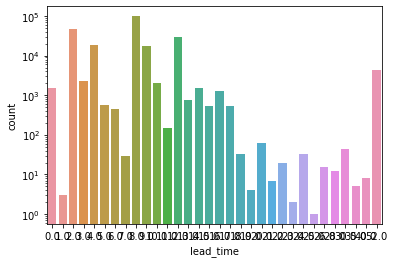

In [26]:

sns.countplot(back_order['lead_time'],log=True)

In [27]:
# % of missing value in every column

for i in back_order.columns:
    percentage =(back_order[i].isnull().sum()/back_order.shape[0]) *100
    print(f"% of missing value in {i} is {percentage}")
    print('*'*50)
    

% of missing value in sku is 0.0
**************************************************
% of missing value in national_inv is 0.000413093408681571
**************************************************
% of missing value in lead_time is 6.082800442836135
**************************************************
% of missing value in in_transit_qty is 0.000413093408681571
**************************************************
% of missing value in forecast_3_month is 0.000413093408681571
**************************************************
% of missing value in forecast_6_month is 0.000413093408681571
**************************************************
% of missing value in forecast_9_month is 0.000413093408681571
**************************************************
% of missing value in sales_1_month is 0.000413093408681571
**************************************************
% of missing value in sales_3_month is 0.000413093408681571
**************************************************
% of missing value in sale

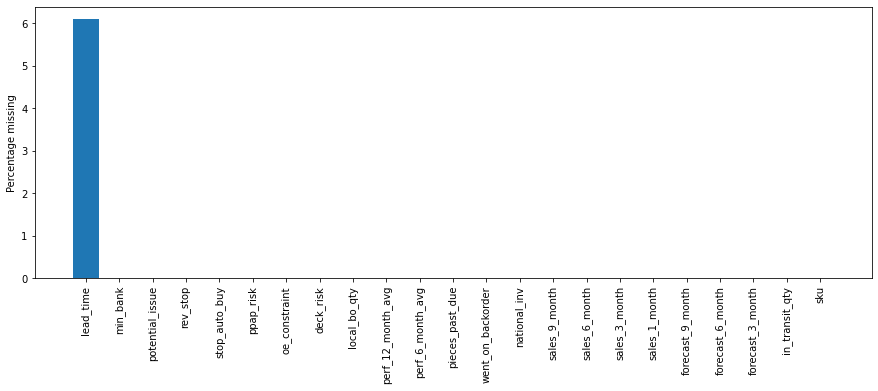

In [28]:

# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(15,5))

missing = back_order.isnull().sum().div(back_order.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([i for i in range(len(back_order.columns))],rotation='vertical')
plt.ylabel("Percentage missing")
plt.show()


 **This plot shows that there is approx 6% of data is missing in the lead_time column**

# working on went_on_backorder

In [30]:
# went_on_backorder is output column

In [31]:
back_order['went_on_backorder'].sample(5)

220594    No
239554    No
56721     No
189559    No
121943    No
Name: went_on_backorder, dtype: object

In [32]:
back_order['went_on_backorder'].value_counts()

No     239387
Yes      2688
Name: went_on_backorder, dtype: int64

In [33]:
# through this we are able to know that our data is highly 'imbalanced data'

In [34]:
back_order['went_on_backorder'].dtype

dtype('O')

In [35]:
#back_order['went_on_backorder'] = back_order['went_on_backorder'].astype('category')

In [36]:
# percentage of 'yes' and 'no'

(back_order['went_on_backorder'].value_counts().div(back_order.shape[0])) *100

No     98.889192
Yes     1.110395
Name: went_on_backorder, dtype: float64

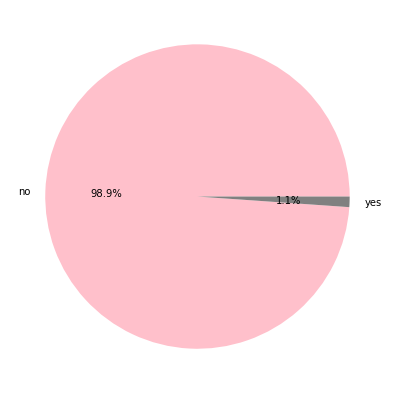

In [37]:
plt.figure(figsize=(10,7))
label=['no','yes']
plt.pie(back_order['went_on_backorder'].value_counts(),labels=label,autopct='%0.1f%%',colors=['pink','grey'])
plt.show()

Positive: 0, Negative: 0


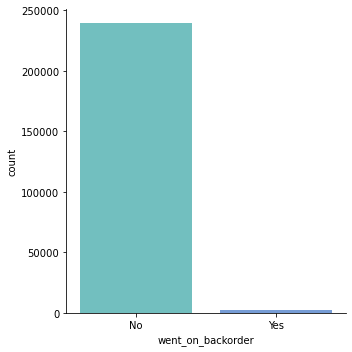

In [38]:
pos = back_order[back_order['went_on_backorder']=='yes'].shape[0]
neg = back_order[back_order['went_on_backorder']=='neg'].shape[0]
print("Positive: " + str(pos) + ", Negative: " + str(neg))
sns.catplot(data=back_order, x="went_on_backorder", kind="count", palette="winter_r", alpha=.6)
plt.show()

# Finding

 - target column(went_on_backorder) is highly imbalanced
 - unequal distribution bcz of imbalace data - 'No' clas is in majority , 'yes' class is in minority
 - we have to treat unbalanced data, otherwise it will effect our model performence
 - there are many ways to handle imbalanced data :-
 - https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

# Handling Imbalanced data

SMOTE+TOMEK is one of such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space.

 - This method combines the SMOTE ability to generate synthetic data for minority class and Tomek Links ability to remove the data that are identified as Tomek links from the majority class

 - To add new data of minority class

 1. Choose random data from the minority class.
 2. Calculate the distance between the random data and its k nearest neighbors.
 3. Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
 4. Repeat step number 2–3 until the desired proportion of minority class is met.
 
 - To remove the tomek links of the majority class

 1. Choose random data from the majority class.
 2. If the random data’s nearest neighbor is the data from the minority class (i.e. create the Tomek Link), then remove the Tomek Link.
 3. This is method instead of adding duplicate data it synthesises the new data based on the already avalialble classes. Hence we choose this as our imputer method for this problem.

In [39]:
# describe

In [40]:
back_order.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,2.420750e+05,227351.000000,242075.000000,2.420750e+05,2.420750e+05,2.420750e+05,242075.000000,2.420750e+05,2.420750e+05,2.420750e+05,242075.000000,242075.000000,242075.000000,242075.000000,242075.000000
mean,4.997510e+02,7.923018,36.178213,1.814723e+02,3.488073e+02,5.082963e+02,51.478195,1.721393e+02,3.404254e+02,5.117754e+02,52.804693,1.824236,-7.093779,-6.632445,0.843726
std,2.928039e+04,7.041410,898.673127,5.648875e+03,1.008180e+04,1.410972e+04,1544.678350,5.164244e+03,9.386523e+03,1.397670e+04,1278.591177,178.679263,26.900636,26.160720,45.606626
min,-2.541400e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-99.000000,-99.000000,0.000000
25%,4.000000e+00,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.630000,0.660000,0.000000
50%,1.500000e+01,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,2.000000e+00,4.000000e+00,0.000000,0.000000,0.820000,0.810000,0.000000
75%,8.100000e+01,9.000000,0.000000,4.000000e+00,1.200000e+01,2.000000e+01,4.000000,1.400000e+01,3.000000e+01,4.600000e+01,3.000000,0.000000,0.960000,0.950000,0.000000
max,1.214579e+07,52.000000,265272.000000,1.510592e+06,2.157024e+06,3.162260e+06,349620.000000,1.099852e+06,2.103389e+06,3.195211e+06,303713.000000,79964.000000,1.000000,1.000000,6232.000000


#  observation

1. For most of the features the mean value is greater than the 75th percentile value which depicts that for each feature distribution is extremely right skewed.
2. Also the difference between the 75th percentile value and max value is for each feature is very high which migh be due to the presence of outliers.
3. The columns perf_6_month_avg and perf_12_month_avg has max. value as 1 and min. value as -99. It seems that the missing values are replaced with -99.

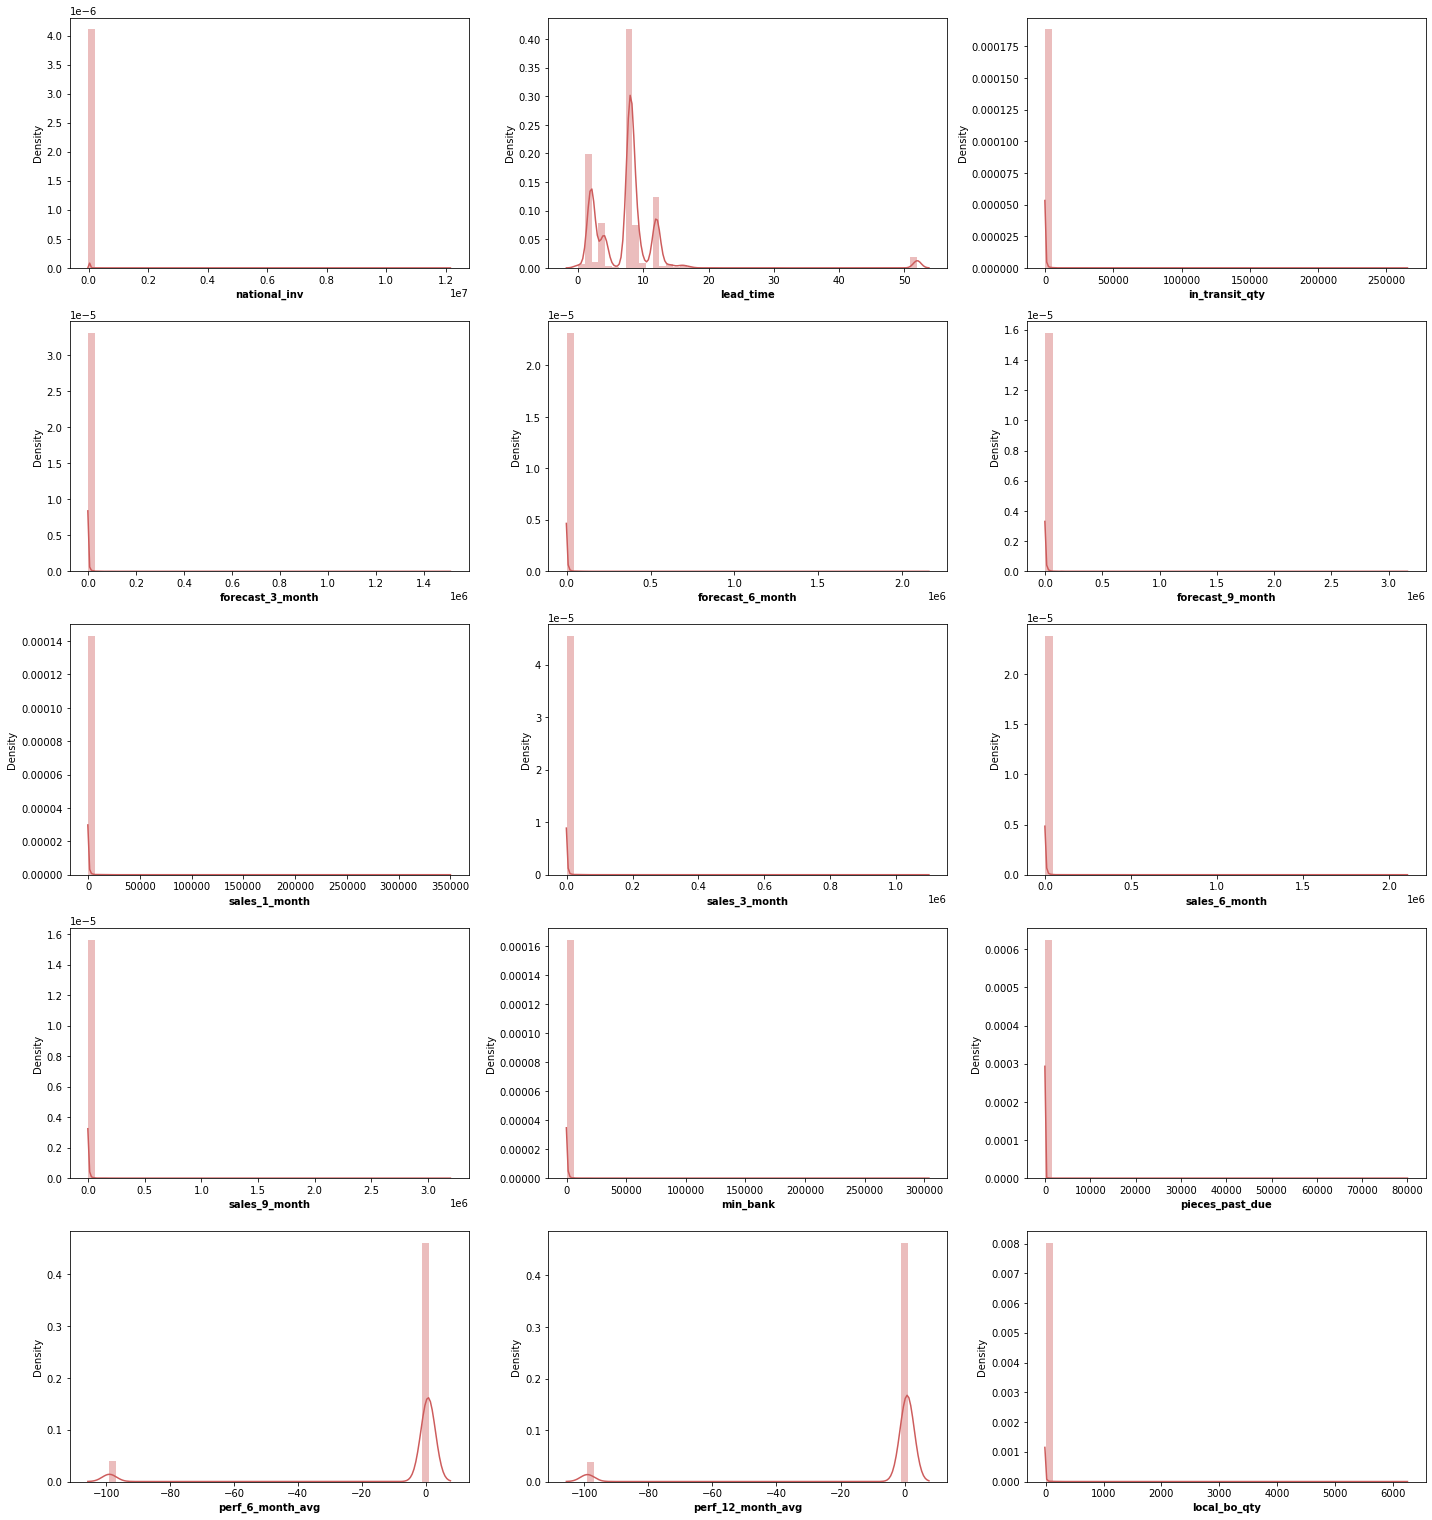

In [41]:

plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_col):
    plt.subplot(6, 3, i+1)
    sns.distplot(x=back_order[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [42]:
#  as per the above finding our data is not normally distributed some are right skewed and other are left skewed

# 

In [43]:

# outliers

# IQR RANGE
for k, v in back_order[numerical_col].items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        inter_q = q3 - q1
        v_col = v[(v <= q1 - 1.5 * inter_q) | (v >= q3 + 1.5 * inter_q)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(back_order)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column national_inv outliers = 15.04%
Column lead_time outliers = 2.10%
Column in_transit_qty outliers = 100.00%
Column forecast_3_month outliers = 21.40%
Column forecast_6_month outliers = 20.27%
Column forecast_9_month outliers = 19.94%
Column sales_1_month outliers = 17.77%
Column sales_3_month outliers = 17.63%
Column sales_6_month outliers = 17.48%
Column sales_9_month outliers = 17.43%
Column min_bank outliers = 21.13%
Column pieces_past_due outliers = 100.00%
Column perf_6_month_avg outliers = 11.23%
Column perf_12_month_avg outliers = 11.88%
Column local_bo_qty outliers = 100.00%


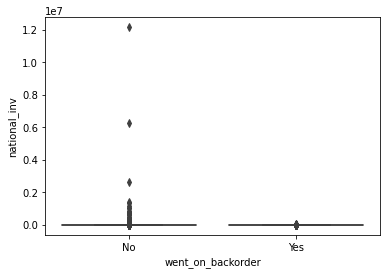

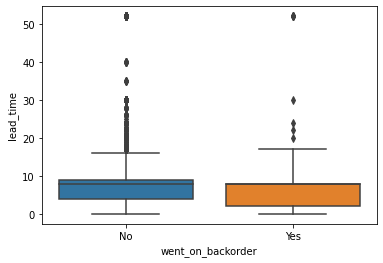

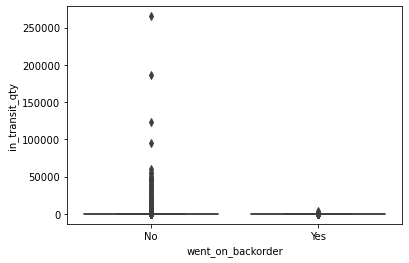

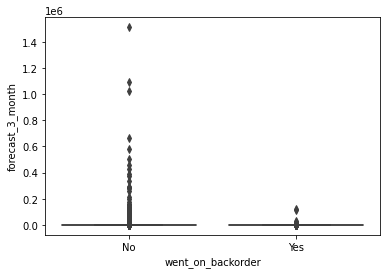

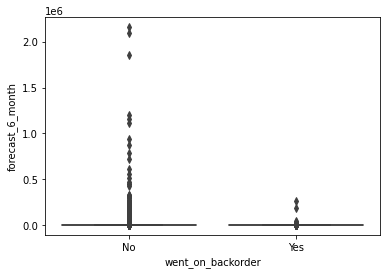

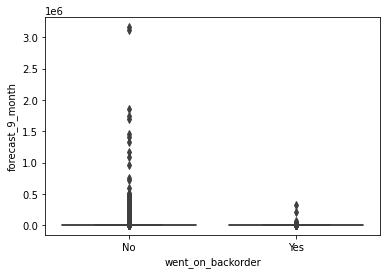

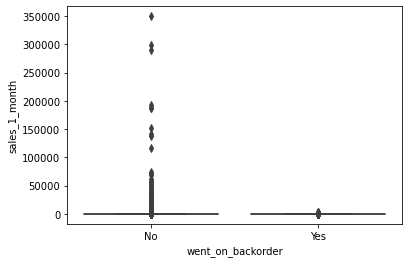

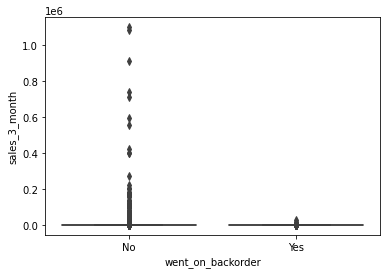

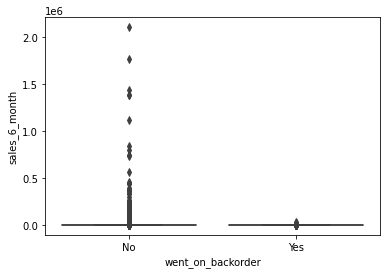

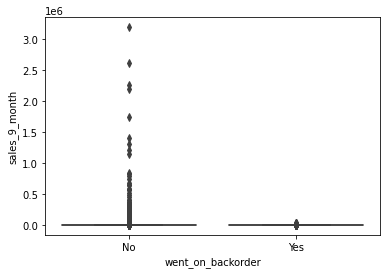

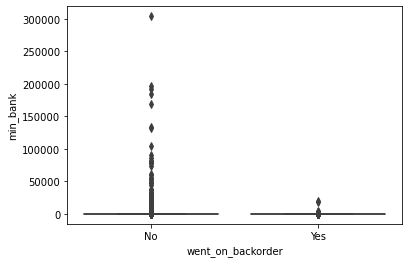

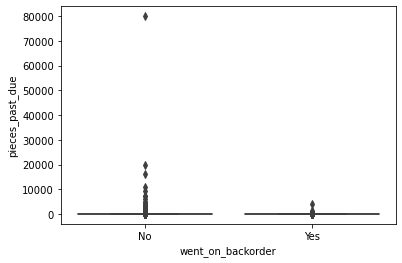

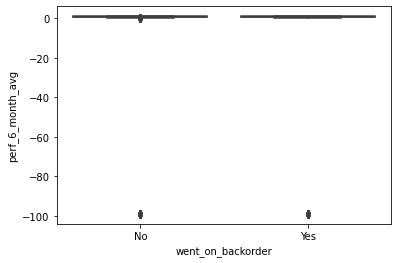

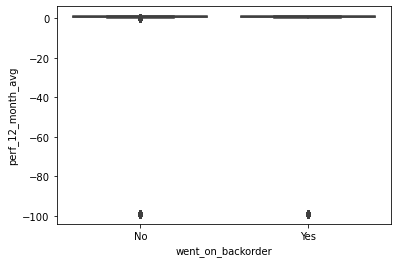

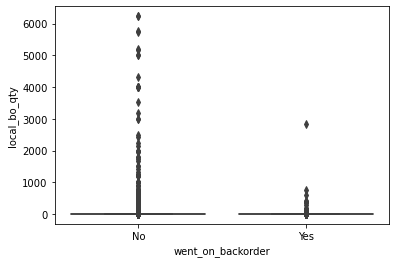

In [44]:
## Box plot
for column in numerical_col:
    sns.boxplot(x = "went_on_backorder",y = column,data = back_order)
    plt.show()

In [45]:
# no. of unique value

In [46]:
for i in categorical_col:
    
    print(f"no of unqiue value in {i} is {len(back_order[i].unique())} ")
    
    print('*'*50)
    

no of unqiue value in sku is 242076 
**************************************************
no of unqiue value in potential_issue is 3 
**************************************************
no of unqiue value in deck_risk is 3 
**************************************************
no of unqiue value in oe_constraint is 3 
**************************************************
no of unqiue value in ppap_risk is 3 
**************************************************
no of unqiue value in stop_auto_buy is 3 
**************************************************
no of unqiue value in rev_stop is 3 
**************************************************
no of unqiue value in went_on_backorder is 3 
**************************************************


In [47]:
# it showing  3 value in every column bcz of nan value
# in each categorical col.  there are only 2 rows which are missing
# after removing these missing value there are only 2 unique value

In [48]:
categorical_col

['sku',
 'potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

In [49]:
# droping sku column
# sku and index column both carry the no. from rows-  both are same column


In [50]:
back_order=back_order.drop(columns=['sku'])

In [51]:
# droping those rows where every value in nan value

back_order.dropna(how='all',inplace=True)

In [52]:
categorical_col = [feature for feature in back_order.columns if back_order[feature].dtype =='O'] 

In [53]:
for i in categorical_col:
    
    print(f"no of unqiue value in {i} is {len(back_order[i].unique())} ")
    
    print('*'*50)
    

no of unqiue value in potential_issue is 2 
**************************************************
no of unqiue value in deck_risk is 2 
**************************************************
no of unqiue value in oe_constraint is 2 
**************************************************
no of unqiue value in ppap_risk is 2 
**************************************************
no of unqiue value in stop_auto_buy is 2 
**************************************************
no of unqiue value in rev_stop is 2 
**************************************************
no of unqiue value in went_on_backorder is 2 
**************************************************


In [54]:
back_order['deck_risk'].unique()

array(['Yes', 'No'], dtype=object)

In [55]:
# value count of all categorical column

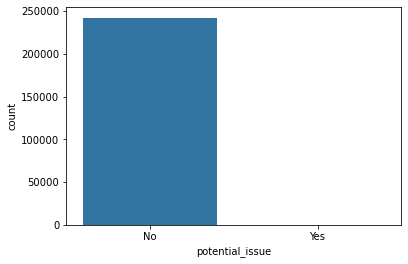

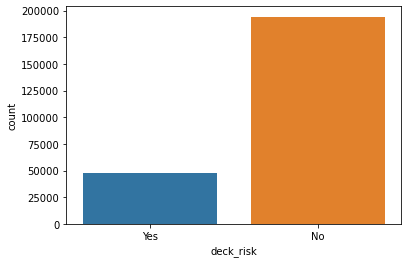

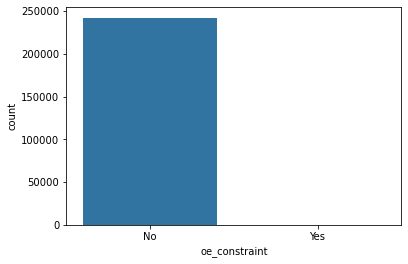

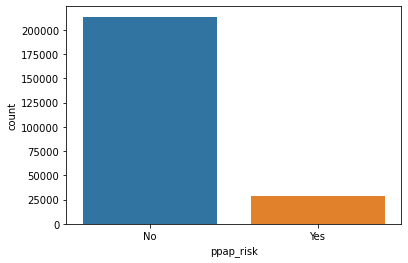

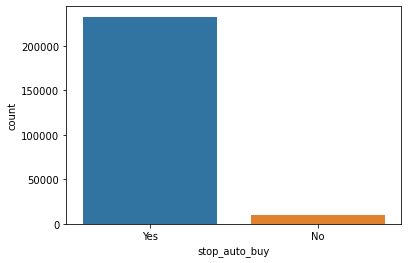

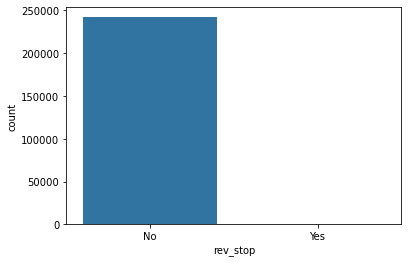

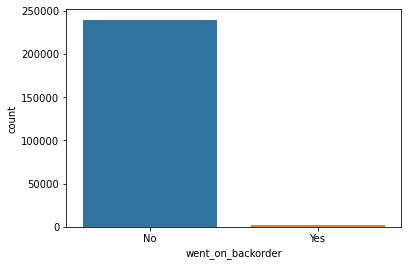

In [56]:
for column in categorical_col:
    sns.countplot(column,data = back_order)
    plt.show()

```
['potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']
```

- all the categorical column has higher no. of NO class,  and very less no. of Yes class

In [57]:
# working on numerical column

In [58]:
numerical_col

['national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'min_bank',
 'pieces_past_due',
 'perf_6_month_avg',
 'perf_12_month_avg',
 'local_bo_qty']

In [59]:
for i in numerical_col:
    
    print(f"no of unqiue value in {i} is {len(back_order[i].unique())} ")
    
    print('*'*50)
    

no of unqiue value in national_inv is 6579 
**************************************************
no of unqiue value in lead_time is 33 
**************************************************
no of unqiue value in in_transit_qty is 1990 
**************************************************
no of unqiue value in forecast_3_month is 3239 
**************************************************
no of unqiue value in forecast_6_month is 4439 
**************************************************
no of unqiue value in forecast_9_month is 5389 
**************************************************
no of unqiue value in sales_1_month is 2163 
**************************************************
no of unqiue value in sales_3_month is 4055 
**************************************************
no of unqiue value in sales_6_month is 5710 
**************************************************
no of unqiue value in sales_9_month is 6996 
**************************************************
no of unqiue value in min_bank is 220

In [60]:
#sns.pairplot(back_order)

In [61]:
colors=['#0101DF','#DF0101']

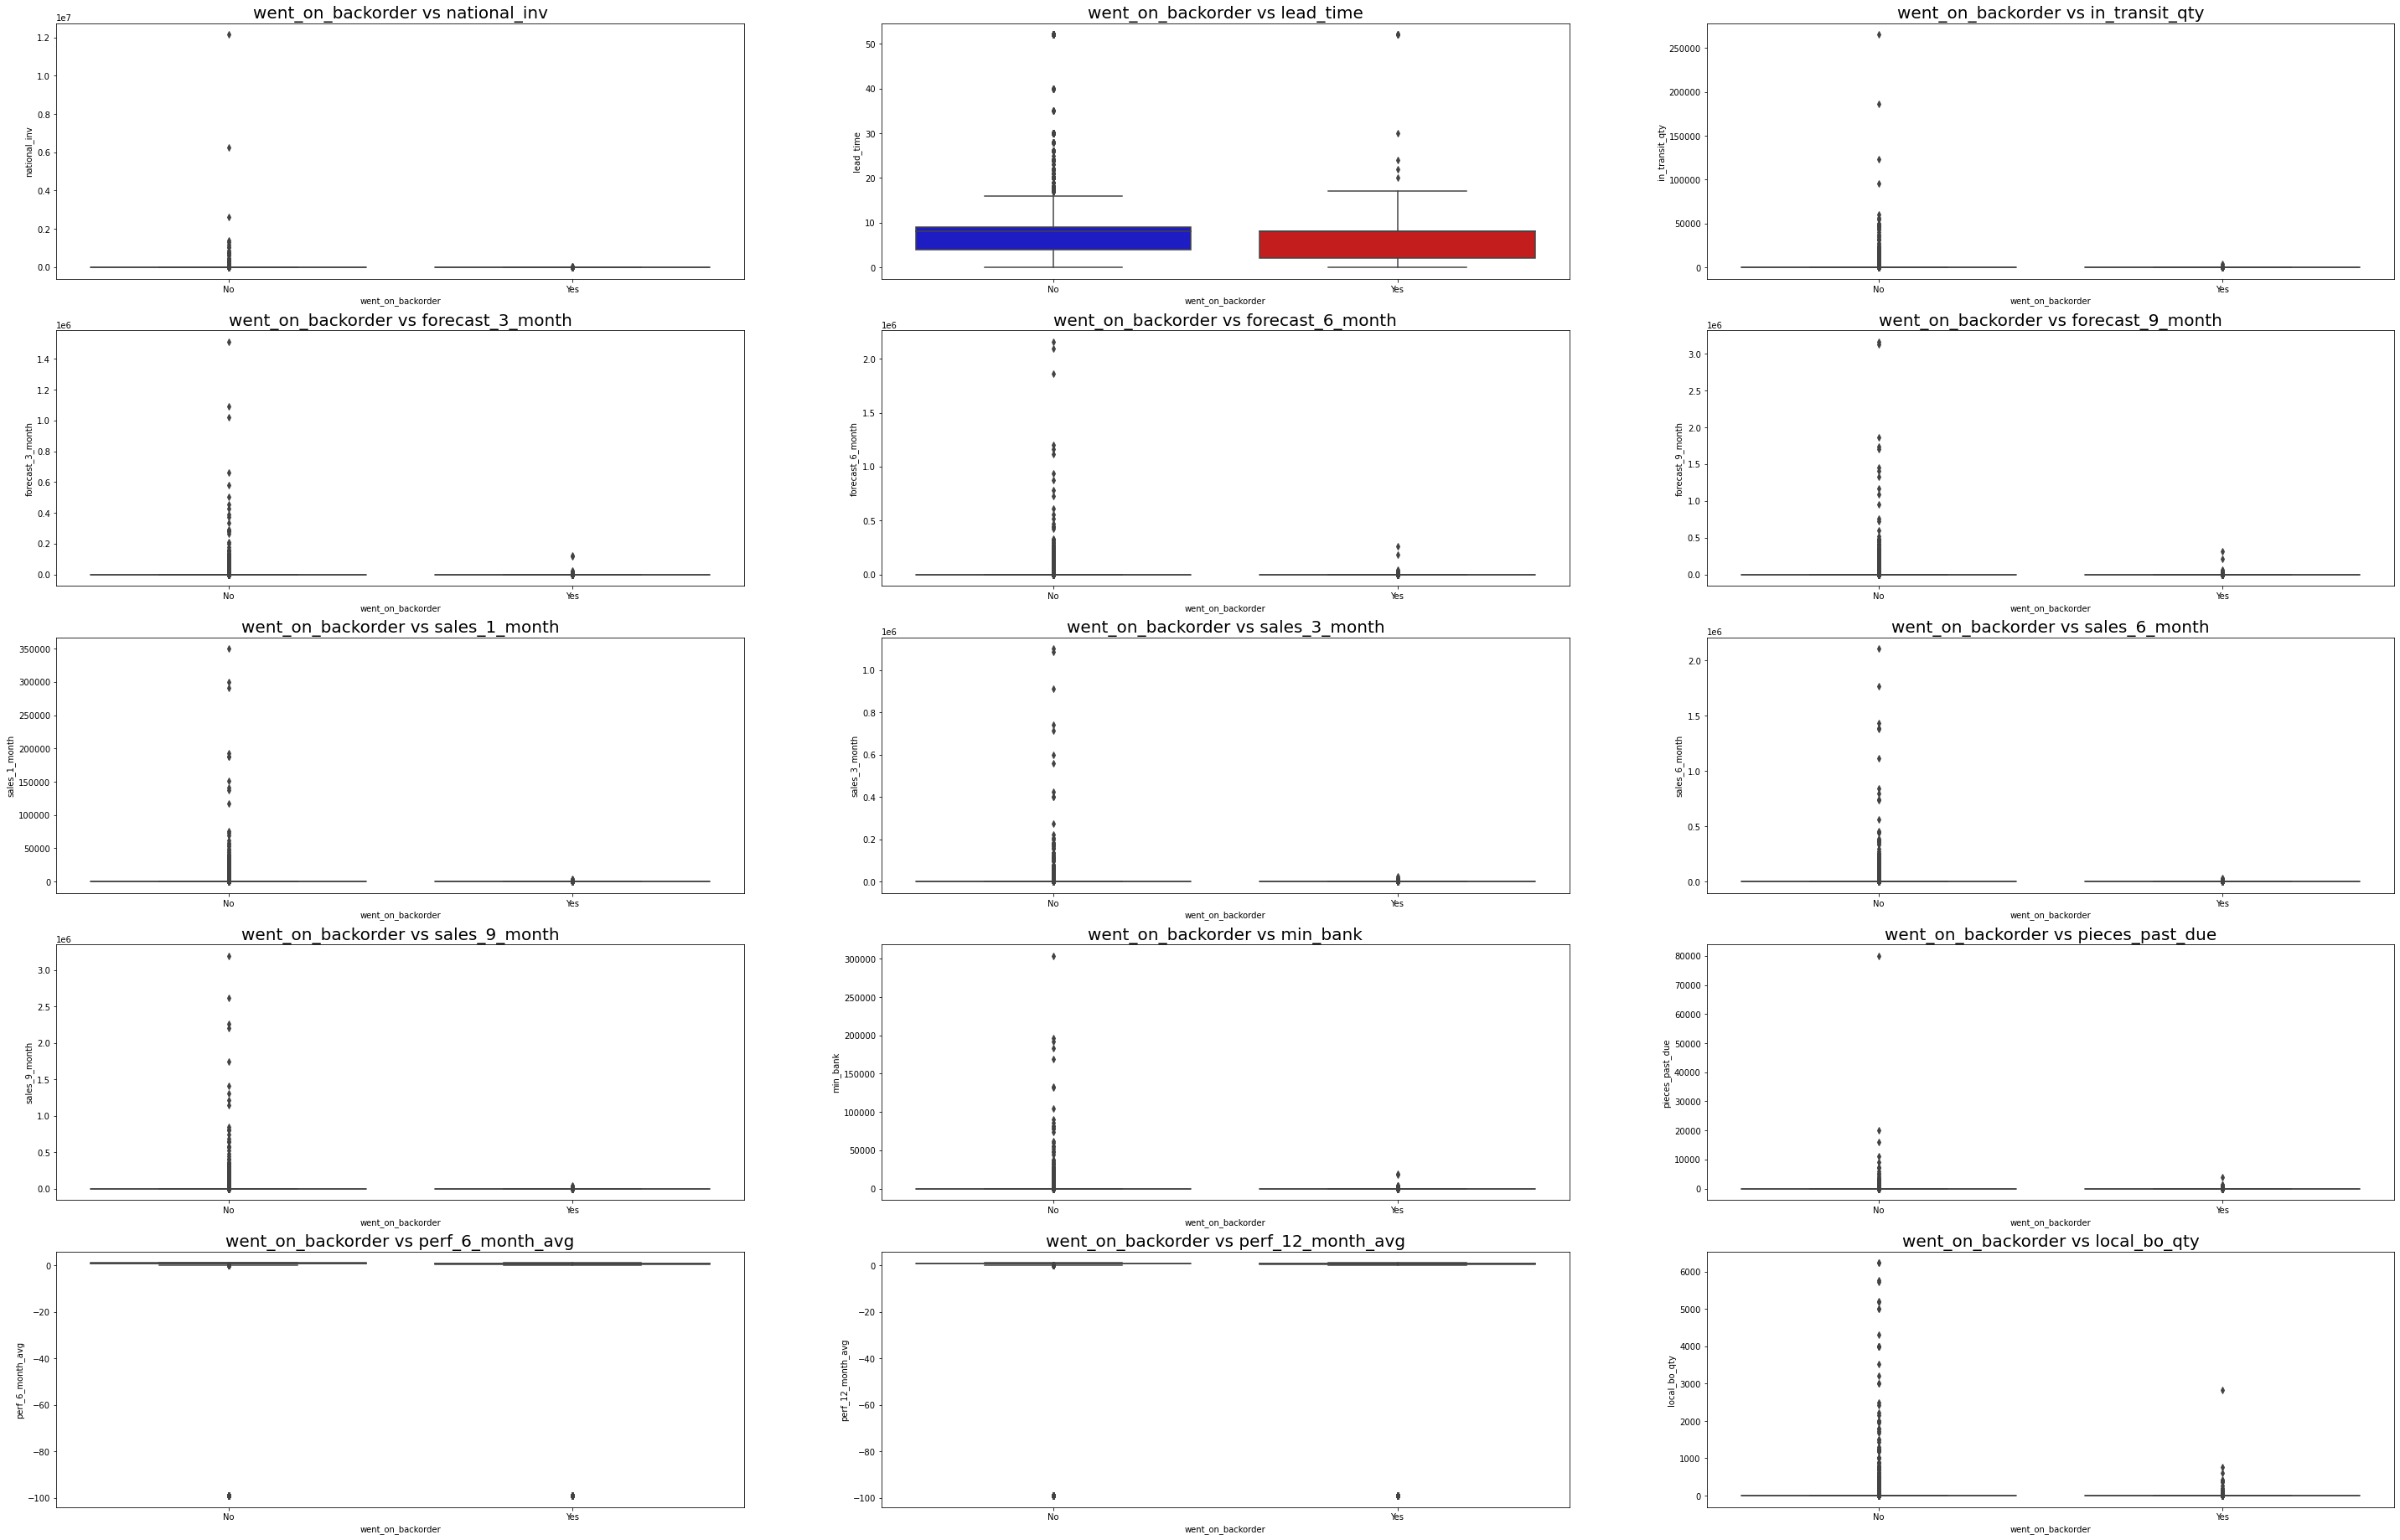

In [62]:
# creating box plot for every feature with respect to 'went on backorder'

plt.figure(figsize=(50,100))
i=0
for feature in numerical_col:
    plt.subplot(15,3,i+1)
    sns.boxplot(x='went_on_backorder',y=feature,data=back_order,palette=colors)
    plt.title(f"went_on_backorder vs {feature}",fontsize=20)
    plt.xlabel('went_on_backorder',fontsize=10)
    plt.ylabel(feature,fontsize=10)
    i=i+1

In [63]:
# there are large no. of outliers for every feature with respect to target column
# data si skewed
# bcz of large no of outlier we can't remove the outlier bcz large no. of data may loose

# correlation matrix

<AxesSubplot:>

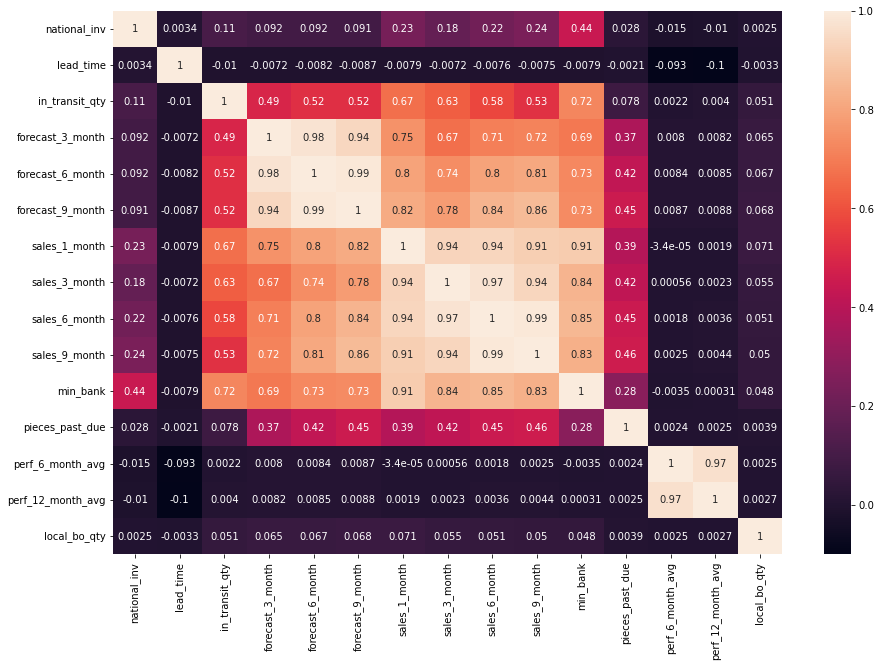

In [64]:
plt.figure(figsize=(15,10), facecolor='white')
sns.heatmap(data=back_order.corr(), annot=True)

-  in_transit_quantity showing correaltion with forcast_3_month, forcast_6_month ,forcast_9_month, sales_1_month, sales_3_month, sales_6_month,sales_9_month,min_bank(Minimum recommend amount to stock)

- forecast_3_month , forecast_6_month and forecast_9_month are very strogly correlated with each other 

- sales_1_month, sales_3_month, sales_6_month and sales_9_month are strongly correlated with each other

- forecast_3_month , forecast_6_month and forecast_9_month also correlated with sales_1_month, sales_3_month, sales_6_month and sales_9_month and min_bank

- min_bank is corelated with forecast_3_month , forecast_6_month and forecast_9_month, sales_1_month, sales_3_month, sales_6_month and sales_9_month

- pref_6_month_avg(Source performance for prior 6 month period)  is highly correlated with pref_12_month_avg

- it means  if the sales are high over last 1/3/6/9 months, then it is resonable for the forcast sales over the next 3/6/9 month to be also high
- if forcast sale of product is high , then it is imp to have more stock in hand

- pieces_past_due(Parts overdue from source) is weekly correlated with sales and forecast column

- national_inv(Current inventory level for the part) is weekly correlated with min_bank(Minimum recommend amount to stock) and weekly correlated with sale columns

# changing categorical col

In [65]:
for col in categorical_col:
    back_order[col] = back_order[col].map({'No':0, 'Yes':1})
    

In [66]:
# here converted all the categorical column into 0 and 1
# no=0
# yes = 1

In [67]:
#changing data type of all categorical column 

back_order[['potential_issue','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop','went_on_backorder']]=back_order[['potential_issue','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop','went_on_backorder']].astype('int64')

In [68]:
back_order.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
1,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,-99.00,-99.00,0.0,0,0,1,0,0,0
2,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.92,0.95,0.0,0,0,0,1,0,0
3,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,0.0,0.78,0.75,0.0,0,0,1,1,0,0
4,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.54,0.71,0.0,0,0,0,1,0,0


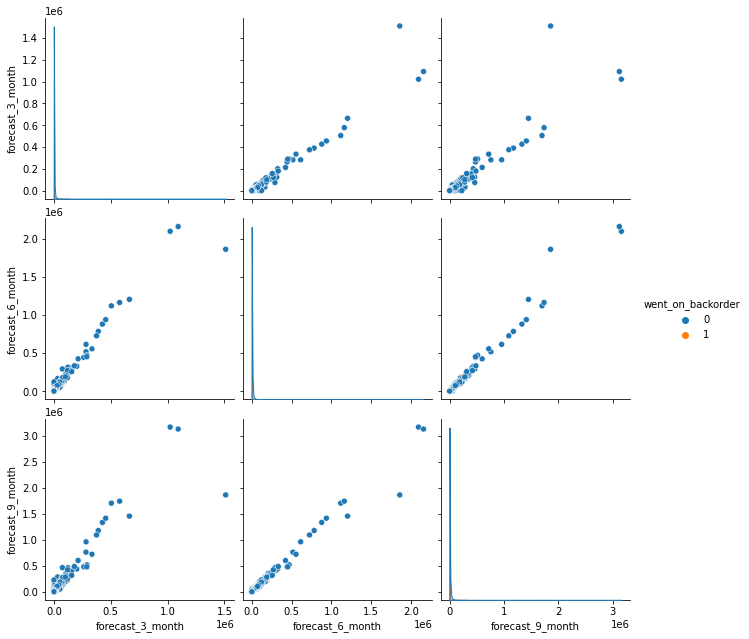

In [69]:
# Take a closer look at correlations with scatter plots.

# Forecast columns
forecasts = ['forecast_3_month','forecast_6_month', 'forecast_9_month']

# Pair-wise scatter plot for the forecasts
sns.pairplot(data = back_order, vars=forecasts, hue='went_on_backorder', height=3)

# Show the plot
plt.show()

In [70]:
# forecast value has very close linear correlation with each other

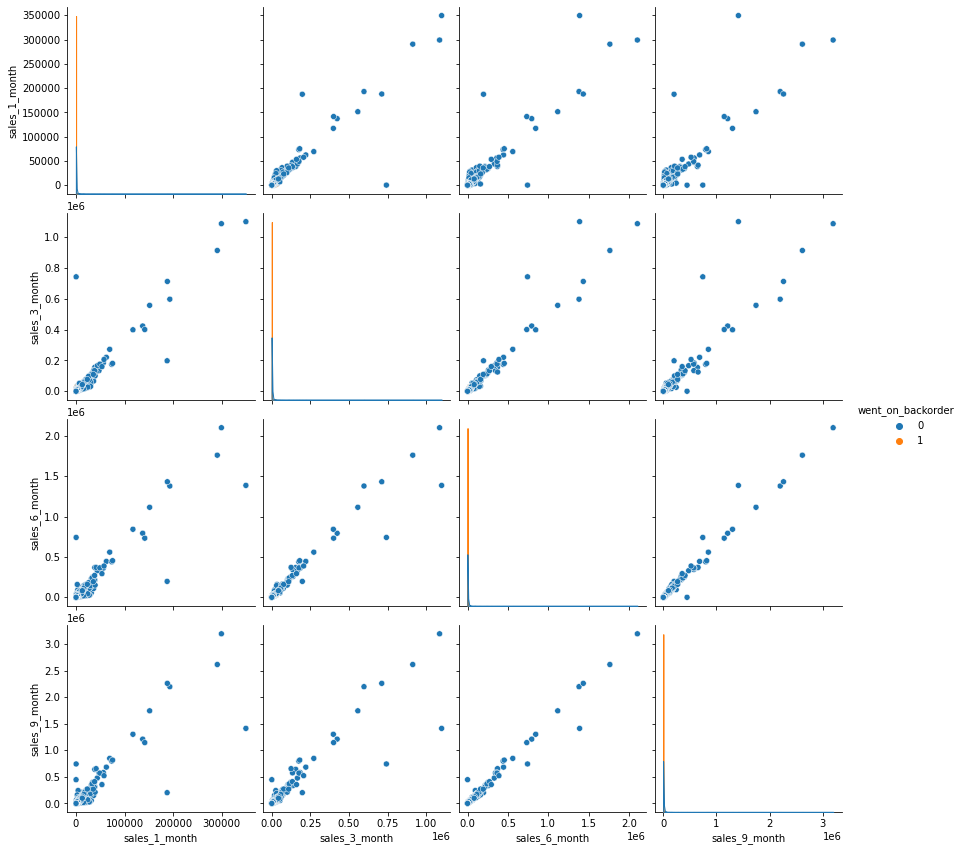

In [71]:
# Sales columns
sales = ['sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month']

# Pair-wise scatter plot for the Sales
sns.pairplot(data=back_order, vars=sales, hue='went_on_backorder', height=3)

# Show the plot
plt.show()

In [72]:
# there is linear correlation b/w these sales column
# in some instances sales column don't follow linear correaltion

# working on lead_time

In [73]:
back_order.isnull().sum()

national_inv             0
lead_time            14724
in_transit_qty           0
forecast_3_month         0
forecast_6_month         0
forecast_9_month         0
sales_1_month            0
sales_3_month            0
sales_6_month            0
sales_9_month            0
min_bank                 0
potential_issue          0
pieces_past_due          0
perf_6_month_avg         0
perf_12_month_avg        0
local_bo_qty             0
deck_risk                0
oe_constraint            0
ppap_risk                0
stop_auto_buy            0
rev_stop                 0
went_on_backorder        0
dtype: int64

In [74]:
# lead_time column has 115617 missing value

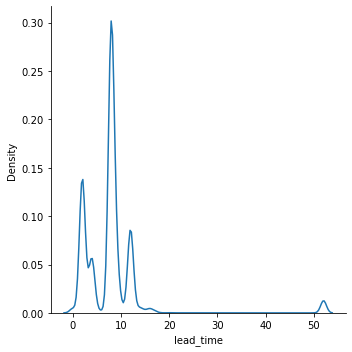

In [75]:
sns.displot(data=back_order,x='lead_time',kind='kde')

In [76]:
# distribution of lead_time is left skewed 

In [77]:
back_order.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
1,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,-99.00,-99.00,0.0,0,0,1,0,0,0
2,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.92,0.95,0.0,0,0,0,1,0,0
3,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,0.0,0.78,0.75,0.0,0,0,1,1,0,0
4,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.54,0.71,0.0,0,0,0,1,0,0


# Evaluate Model on Different experiments

# splitting the data

In [78]:
#Splitting X and y for all Experiments
X= back_order.drop('went_on_backorder', axis=1)
y = back_order['went_on_backorder']

# using robust scaler



 - X' = X - X_median / IQR

 - sklearn.preprocessing.RobustScaler

 - Scale features using statistics that are robust to outliers.

 - This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile)

 - perform better in the data with outlier

**Why Robust scaler and not Standard scaler?**
- Scaling the data using Robust scaler
- Since most of the independent variables are not normally distributed we cannot use Standardscaler

**Why Robust Scaler and not Minmax?** 
- because most of the feature has outliers. So Minmax will scale data according to Max values which is outlier.
- This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [79]:
# robust scaler

# Fit with robust scaler for KNN best K-selection experminet
robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

#  1st method -pipeline and simple imputer - median

In [80]:
num_features = X.select_dtypes(exclude="object").columns

# Fit the Simple imputer with strategy median
median_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('RobustScaler', RobustScaler())
])

In [81]:
X_median = median_pipeline.fit_transform(X)

# for unblanced data use smotetomek

# handling imbalance data

 **SMOTE+TOMEK** is one of such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space.
 
 - This method combines the SMOTE ability to generate synthetic data for minority class and Tomek Links ability to remove the data that are identified as Tomek links from the majority class
 
 - To add new data of minority class
 1. Choose random data from the minority class.
 2. Calculate the distance between the random data and its k nearest neighbors.
 3. Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
 4. Repeat step number 2–3 until the desired proportion of minority class is met.
 
 - To remove the tomek links of the majority class
 1. Choose random data from the majority class.
 2. If the random data’s nearest neighbor is the data from the minority class (i.e. create the Tomek Link), then remove the Tomek Link.
 
 - This is method instead of adding duplicate data it synthesises the new data based on the already avalialble classes. Hence we choose this as our imputer method for this problem.
 
 https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc

In [82]:
from imblearn.combine import SMOTETomek

In [83]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority')
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_median, y)

# model building

In [84]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [85]:
print(len(models))

7


In [86]:
def all_model(x_res,y_res,models):
    
    
    # splitting data
    X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
    
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train)
        
        
        # prediction
        y_pred = model.predict(X_test)
        
        # accuracy
        #model_train_accuracy, model_train_f1,model_train_precision,\
        #model_train_recall,model_train_rocauc_score=evaluate_clf(y_test, y_pred)
        
        print(f"the model is {model}")
        print()
        
        print(f"Accuracy  : {accuracy_score(y_test, y_pred)}") 
        print(f"f1  : {f1_score(y_test, y_pred)}") 
        print(f"precision  : {precision_score(y_test, y_pred)}") 
        print(f"recall  : {recall_score(y_test, y_pred)}") 
        print(f"roc_auc  : {roc_auc_score(y_test, y_pred)}") 
        
        
        print('*'*50)
        
        
        
    
    

In [87]:
all_model(X_res, y_res, models)

the model is RandomForestClassifier()

Accuracy  : 0.9915914598479151
f1  : 0.991611000531477
precision  : 0.9908159440209922
recall  : 0.9924073340147265
roc_auc  : 0.9915902137172702
**************************************************
the model is DecisionTreeClassifier()

Accuracy  : 0.9846139383304087
f1  : 0.984662800262388
precision  : 0.983035343035343
recall  : 0.986295655076031
roc_auc  : 0.9846113697495438
**************************************************
the model is GradientBoostingClassifier()

Accuracy  : 0.9342253697668589
f1  : 0.9349960256423491
precision  : 0.9255466993664418
recall  : 0.9446402870194615
roc_auc  : 0.9342094624761499
**************************************************
the model is LogisticRegression()

Accuracy  : 0.7288794184006017
f1  : 0.7718394542993267
precision  : 0.667005970738822
recall  : 0.9157714690974322
roc_auc  : 0.72859396762749
**************************************************
the model is KNeighborsClassifier()

Accuracy  : 0.96203100

#### finding

Model | accuracy
- | - 
Random Forest | 0.9915914598479151
Decision Tree| 0.9846139383304087
Gradient Boosting | 0.9342253697668589
Logistic Regression | 0.7288794184006017
K-Neighbors Classifier | 0.962031001921952   
XG Boost |  0.9900664326898972
AdaBoost Classifier|  0.8991706359154341





 <span style='color:blue'> 
here the imputation method is median 
The most accurate model is random forest with accuracy - 0.991591 </span> 

# 2nd method - using mean

In [89]:
num_features = X.select_dtypes(exclude="object").columns

# Fit the Simple imputer with strategy mean
mean_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('RobustScaler', RobustScaler())
])

In [90]:
X_mean = mean_pipeline.fit_transform(X)

In [91]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority')
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_mean, y)

In [92]:
all_model(X_res, y_res, models)

the model is RandomForestClassifier()

Accuracy  : 0.9919466031586864
f1  : 0.9919582790091264
precision  : 0.9918444819890286
recall  : 0.992072102144705
roc_auc  : 0.9919464351406313
**************************************************
the model is DecisionTreeClassifier()

Accuracy  : 0.9831933650873235
f1  : 0.9832575465906371
precision  : 0.9808183346826929
recall  : 0.9857089209713761
roc_auc  : 0.9831899972608533
**************************************************
the model is GradientBoostingClassifier()

Accuracy  : 0.933201721400518
f1  : 0.9338860917840934
precision  : 0.9256276257813301
recall  : 0.9422932487690896
roc_auc  : 0.9331895496627641
**************************************************
the model is LogisticRegression()

Accuracy  : 0.7523606584774797
f1  : 0.7877110979781157
precision  : 0.6900040786872902
recall  : 0.9176541767503964
roc_auc  : 0.7521393634986188
**************************************************
the model is KNeighborsClassifier()

Accuracy  : 0.963

In [93]:
# finding

## finding

Model | accuracy
- | - 
Random Forest | 0.9919466031586864
Decision Tree| 0.9831933650873235
Gradient Boosting | 0.933201721400518
Logistic Regression | 0.7523606584774797
K-Neighbors Classifier | 0.9631068772457592   
XG Boost |   0.9902440043452828
AdaBoost Classifier|  0.9011761510821426





   
 <span style='color:blue'> 
here the imputation method is mean 
The most accurate model is random forest with accuracy -- 0.991946 </span> 

# 3rd method  - MICE

- MICE stands for Multivariate Imputation By Chained Equations algorithm
- This technique by which we can effortlessly impute missing values in a dataset by looking at data from other columns and trying to estimate the best prediction for each missing value.
- **ImputationKernel** Creates a kernel dataset. This dataset can perform MICE on itself, and impute new data from models obtained during MICE.

In [94]:
!pip install miceforest

In [95]:
import miceforest as mf

X_mice = X.copy()
kernel = mf.ImputationKernel(
  X_mice,
  save_all_iterations=True,
  random_state=5
)

In [96]:
X_mice = kernel.complete_data()

In [97]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1 )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_mice, y)

In [98]:
all_model(X_res, y_res, models)

the model is RandomForestClassifier()

Accuracy  : 0.9915074531760871
f1  : 0.9915214466727152
precision  : 0.9909117438612581
recall  : 0.9921319002400083
roc_auc  : 0.9915068067370362
**************************************************
the model is DecisionTreeClassifier()

Accuracy  : 0.983077581974491
f1  : 0.9831495735385896
precision  : 0.9799896319336444
recall  : 0.9863299593029323
roc_auc  : 0.983074215053842
**************************************************
the model is GradientBoostingClassifier()

Accuracy  : 0.9323416657091225
f1  : 0.9327742431004599
precision  : 0.9277956722827883
recall  : 0.937806532401127
roc_auc  : 0.9323360083789138
**************************************************
the model is LogisticRegression()

Accuracy  : 0.7633159582580356
f1  : 0.7779106467232557
precision  : 0.7333986360360027
recall  : 0.8281748930397579
roc_auc  : 0.7632488150994338
**************************************************
the model is KNeighborsClassifier()

Accuracy  : 0.9633

In [99]:
# finding

## finding


Model | accuracy
- | - 
Random Forest |  0.9915074531760871
Decision Tree| 0.983077581974491
Gradient Boosting | 0.9323416657091225
Logistic Regression | 0.7633159582580356
K-Neighbors Classifier | 0.9631068772457592   
XG Boost |   0.9900241301145919
AdaBoost Classifier|  0.9067386739927505

   
 <span style='color:blue'> 
here the imputation method is MICE 
The most accurate model is random forest with accuracy -- 0.99150  </span>  

# Final model

##Report

 - work with 3 different imputation technique :
     1. Median
     2. mean
     3. Mice ( Multivariate Imputation By Chained Equations algorithm)
     
 *** 
---
___
     
### <span style='background:yellow'> After applying all these 3 technique, we get best result with 'mean', and the best model is 'Random Forest'  </span>
 


### Fitting the Final model

In [100]:
num_features = X.select_dtypes(exclude="object").columns

# Fit the Simple imputer with strategy mean
mean_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('RobustScaler', RobustScaler())
])

In [101]:
X_mean = mean_pipeline.fit_transform(X)

In [102]:
final_model = RandomForestClassifier()

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_mean, y)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [107]:

print("Final Random Forest Accuracy Score  :", accuracy_score(y_test,y_pred))

Final Random Forest Accuracy Score  : 0.9902440043452828


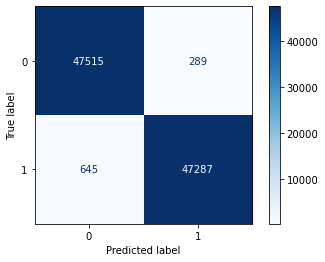

In [106]:
from sklearn.metrics import plot_confusion_matrix

#plots Confusion matrix
plot_confusion_matrix(final_model, X_test, y_test, cmap='Blues', values_format='d')

The confusion matrix is a matrix used to determine the performance of the classification models for a given set of test data.

The above table has the following cases:

- True Negative: Model has given prediction No, and the real or actual value was also No.
- True Positive: The model has predicted yes, and the actual value was also true.
- False Negative: The model has predicted no, but the actual value was Yes, it is also called as Type-II error.
- False Positive: The model has predicted Yes, but the actual value was No. It is also called a Type-I error.